# My question is what the most used song key is in these top songs.
# I think an observational study is fit to this, as we won't need to change anything in order to find the answer.
# I also think we should look at all the tracks in the dataset in order to minimize natural variation.
# I will use a dataset hosted by Hina Goto on GitHub.
# The link to that is available here: https://github.com/hina0830g/Spotify-Top-Charts-Analysis/blob/main/Top_Hits_2000_2019.csv
# This is a modified version of the Top Hits Spotify from 2000-2019 dataset created by Kaggle.
# The link to that is available here: https://kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data
# The modified dataset is slightly different from the Kaggle dataset (e.g. duration in ms -> duration in min).
# The Kaggle dataset was compiled by looking at the global top songs playlist Spotify produces every year, in this case the years 2000-2019.

# Biases:
# We are only looking at songs from this period, which are not representative of music of other times.
# This only represents the most popular songs on Spotify, while not all songs are hosted on Spotify.
# Some songs may also be more/less popular specifically on Spotify compared to on other platforms.
# Tempo was estimated rather than determined objectively, so it may be slightly off.

Frequency Table of Song Keys:
Musical Key  Number of Songs  Relative Frequency
         C#              267              0.1335
          B              199              0.0995
          C              198              0.0990
          G              197              0.0985
          F              182              0.0910
         G#              173              0.0865
          D              158              0.0790
          A              157              0.0785
         F#              154              0.0770
         A#              129              0.0645
          E              126              0.0630
         D#               60              0.0300


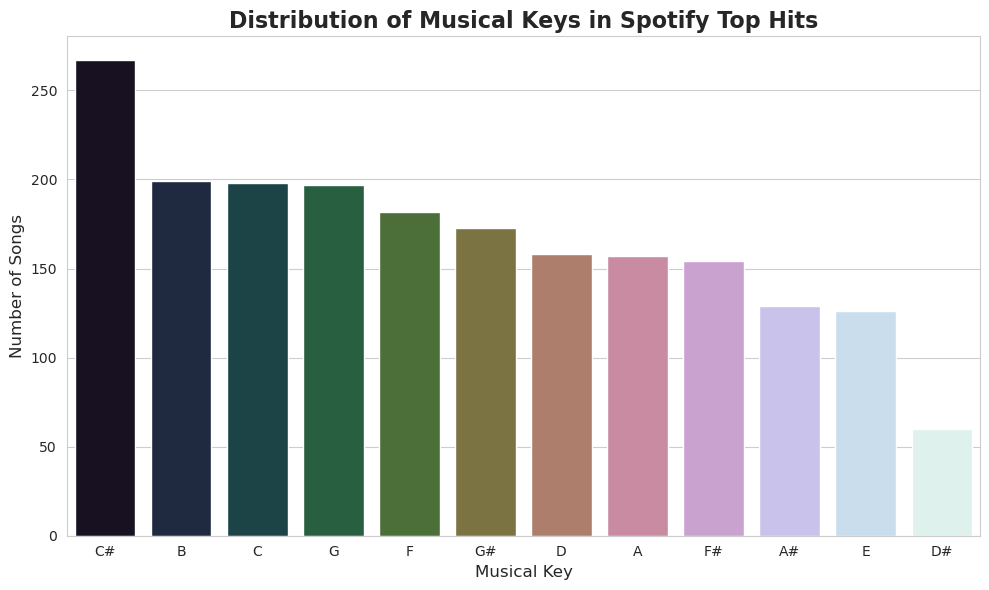

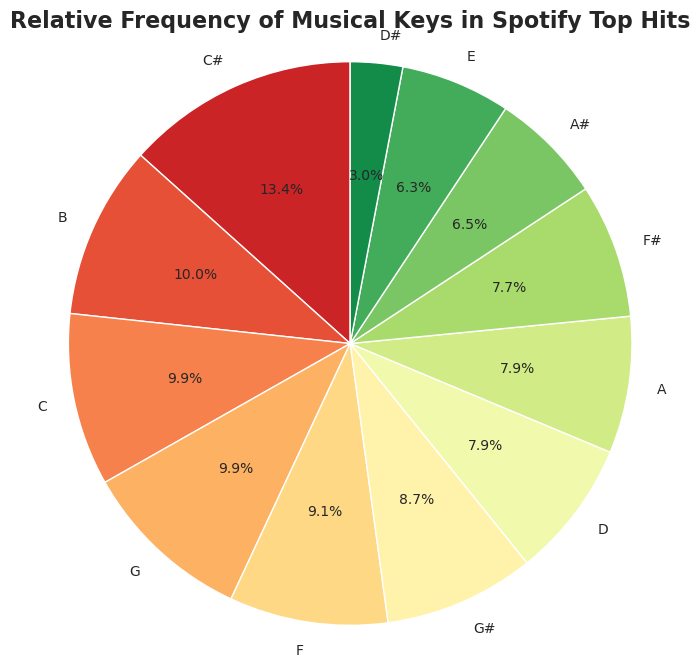

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats as st

top_hits = pd.read_csv("Top_Hits_2000_2019.csv")

# Create and print frequency and relative frequency table of song keys
key_freq = top_hits["key"].value_counts().reset_index()
key_freq.columns = ["Musical Key", "Number of Songs"]
key_freq["Relative Frequency"] = key_freq["Number of Songs"] / 2000
print("Frequency Table of Song Keys:")
print(key_freq.to_string(index=False))

# --- BARPLOT --- #

# Create the bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(
    data=top_hits,
    x="key",
    order=top_hits["key"].value_counts().index, # Order song keys by frequency
    palette="cubehelix"
)

# Add titles and labels
plt.title("Distribution of Musical Keys in Spotify Top Hits", fontsize=16, weight='bold')
plt.xlabel("Musical Key", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)

# Show the barplot
plt.tight_layout()
plt.show()

# --- PIE CHART --- #

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    key_freq["Relative Frequency"], 
    labels=key_freq["Musical Key"], 
    autopct='%1.1f%%', # show percentages
    startangle=90, # start at top
    colors=sns.color_palette("RdYlGn", len(key_freq))
)

# Add title, make circular, and show
plt.title("Relative Frequency of Musical Keys in Spotify Top Hits", fontsize=16, weight='bold')
plt.axis('equal')
plt.show()

# Conclusion: C# was the most used key across these top songs.
# Specifically, it accounted for 13.4% of all songs, while the next most used key, B, accounted for 10% of them.
# Most song keys were used in 7-10% of all songs on the playlist.
# The least used key, D#, was used in only 3% of songs.